<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<h1 style="text-align:center">   
      <font color = MidnightBlue >
                Fake News Detection with NLP and ML 
        </font>    
</h1>   
<hr style="width:100%;height:3px;border-width:0;background-color:silver">
<center><img style = "height:550px;" src="https://images.livemint.com/rf/Image-621x414/LiveMint/Period2/2018/05/05/Photos/Processed/fakereal-k2QC--621x414@LiveMint.jpg"></center>
<br>
<h2><font color = MidnightBlue>What is "Fake News"?</font></h2>
<p>“Fake news” is a term that has come to mean different things to different people. At its core, we are defining “fake news” as those news stories that are false: the story itself is fabricated, with no verifiable facts, sources or quotes. Sometimes these stories may be propaganda that is intentionally designed to mislead the reader, or may be designed as “clickbait” written for economic incentives (the writer profits on the number of people who click on the story). In recent years, fake news stories have proliferated via social media, in part because they are so easily and quickly shared online.</p>
<h2><font color = MidnightBlue>About Dataset</font></h2>
<p>This data set consists of 40000 fake and real news. Our goal is to train our model to accurately predict whether a particular piece of news is real or fake. Fake and real news data are given in two separate data sets, with each data set consisting of approximately 20000 articles.</p>
<br>

<a id = 1></a>
<h1><font color = MidnightBlue>Import Libraries</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# import keras
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Bidirectional
from tensorflow.keras.models import Model
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<a id = 2></a>
<h1><font color = MidnightBlue>Load and Check Data</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

In [2]:
# Load the data
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [3]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [5]:
#add column 
df_true['isfake'] = 0
df_fake['isfake'] = 1

In [6]:
#Merging the 2 datasets
df = pd.concat([df_true,df_fake]).reset_index(drop = True)
df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44893  McPain: John McCain Furious That Iran Treated ...   
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44893  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44894  21st Century Wire says It s a familiar theme. ...   Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44896  21st Century Wire says Al Jazeera America will...   Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  isfake  
0      December 31, 2017        0  
1      December 29, 2017        0  
2      December 31, 2017        0  
3      December 30, 2017        0  
4      December 29, 2017        0  
...                   ...     ...  
44893    January 16, 2016       1  
44894    January 16, 2016       1  
44895    January 15, 2016       1  
44896    January 14, 2016       1  
44897    January 12, 2016       1  

[44898 rows x 5 columns]

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
isfake     0
dtype: int64

<a id = 3></a>
<h1><font color = MidnightBlue>Visualization</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

# Concate Columns

In [8]:
df['text'] = df['date'] + " " + df['subject'] + " " + df['title'] + " " + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  December 31, 2017  politicsNews As U.S. budget...  politicsNews   
1  December 29, 2017  politicsNews U.S. military ...  politicsNews   
2  December 31, 2017  politicsNews Senior U.S. Re...  politicsNews   
3  December 30, 2017  politicsNews FBI Russia pro...  politicsNews   
4  December 29, 2017  politicsNews Trump wants Po...  politicsNews   

                 date  isfake  
0  December 31, 2017        0  
1  December 29, 2017        0  
2  December 31, 2017        0  
3  December 30, 2017        0  
4  December 29, 2017        0

# Removal Unuseful Columns

In [9]:
del df['title']
del df['subject']
del df['date']
df.head()

text  isfake
0  December 31, 2017  politicsNews As U.S. budget...       0
1  December 29, 2017  politicsNews U.S. military ...       0
2  December 31, 2017  politicsNews Senior U.S. Re...       0
3  December 30, 2017  politicsNews FBI Russia pro...       0
4  December 29, 2017  politicsNews Trump wants Po...       0

In [10]:
first_text = df.text[0]
first_text

'December 31, 2017  politicsNews As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also wan

In [11]:
from sklearn.utils import shuffle
df = shuffle(df)
df.head()
df.shape

(44898, 2)

# Convert to Lowercase

In [12]:
df['text'] = df['text'].str.lower()
df.head()

text  isfake
7773   october 18, 2016  politicsnews obama says trum...       0
3559   may 25, 2017  politicsnews house panel chairma...       0
15309  november 9, 2017  worldnews qatar retools afte...       0
34888  jul 21, 2016 politics boom! donald trump, jr w...       1
5687   february 3, 2017  politicsnews israel interpre...       0

# Removal of Punctuations

In [15]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

In [17]:
df['text'] = df['text'].apply(lambda x: remove_punctuations(x))
df.head()

text  isfake
7773   october 18 2016  politicsnews obama says trump...       0
3559   may 25 2017  politicsnews house panel chairman...       0
15309  november 9 2017  worldnews qatar retools after...       0
34888  jul 21 2016 politics boom donald trump jr wins...       1
5687   february 3 2017  politicsnews israel interpret...       0

# Removal of Extra Space

In [18]:
def remove_extra_spaces(text):
    return ' '.join(text.split())

In [19]:
df['text'] = df['text'].apply(remove_extra_spaces)
print(df['text'])

7773     october 18 2016 politicsnews obama says trump ...
3559     may 25 2017 politicsnews house panel chairman ...
15309    november 9 2017 worldnews qatar retools after ...
34888    jul 21 2016 politics boom donald trump jr wins...
5687     february 3 2017 politicsnews israel interprets...
                               ...                        
29758    february 4 2016 news black teen volunteers for...
18574    october 1 2017 worldnews gibraltar very concer...
39949    jun 5 2017 leftnews wow ratings are in for ant...
41911    may 31 2016 leftnews democrats eat their own s...
36216    dec 13 2015 politics whoa new shock poll shows...
Name: text, Length: 44898, dtype: object


# Removal of Stopwords

In [20]:
nltk.download("stopwords")   
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [21]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

In [22]:
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))
df.head()

text  isfake
7773   october 18 2016 politicsnews obama says trump ...       0
3559   may 25 2017 politicsnews house panel chairman ...       0
15309  november 9 2017 worldnews qatar retools boycot...       0
34888  jul 21 2016 politics boom donald trump jr wins...       1
5687   february 3 2017 politicsnews israel interprets...       0

# Removal of Frequent Words

In [33]:
from collections import Counter
word_count = Counter()
for text in df['text']:
    for word in text.split():
        word_count[word] += 1
        
word_count.most_common(10)

[('trump', 142468),
 ('said', 130261),
 ('us', 68254),
 ('s', 62149),
 ('state', 61708),
 ('presid', 58109),
 ('would', 55437),
 ('peopl', 41981),
 ('say', 40597),
 ('republican', 39958)]

In [34]:
FREQUENT_WORDS = set(word for (word, wc) in word_count.most_common(1))
def remove_freq_words(text):
    return " ".join([word for word in text.split() if word not in FREQUENT_WORDS])

In [35]:
df['text'] = df['text'].apply(lambda x: remove_freq_words(x))
df.head()

text  isfake
7773   octob 18 2016 politicsnew obama say embrac rus...       0
3559   may 25 2017 politicsnew hous panel chairman sa...       0
15309  novemb 9 2017 worldnew qatar retool boycott to...       0
34888  jul 21 2016 polit boom donald jr win best cruz...       1
5687   februari 3 2017 politicsnew israel interpret u...       0

# Removal of Rare Words

In [36]:
RARE_WORDS = set(word for (word, wc) in word_count.most_common()[:-10:-1])
RARE_WORDS

{'12via',
 'behigh',
 'belowoveral',
 'clifffac',
 'methodologysaturday',
 'muslimspatterson',
 'pollingdmr',
 'pollingit',
 'prohispan'}

In [37]:
def remove_rare_words(text):
    return " ".join([word for word in text.split() if word not in RARE_WORDS])

In [38]:
df['text'] = df['text'].apply(lambda x: remove_rare_words(x))
df.head()

text  isfake
7773   octob 18 2016 politicsnew obama say embrac rus...       0
3559   may 25 2017 politicsnew hous panel chairman sa...       0
15309  novemb 9 2017 worldnew qatar retool boycott to...       0
34888  jul 21 2016 polit boom donald jr win best cruz...       1
5687   februari 3 2017 politicsnew israel interpret u...       0

# Removal of Special characters

In [29]:
import re
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

In [30]:
df['text'] = df['text'].apply(lambda x: remove_spl_chars(x))
df.head()

text  isfake
7773   october 18 2016 politicsnews obama says trump ...       0
3559   may 25 2017 politicsnews house panel chairman ...       0
15309  november 9 2017 worldnews qatar retools boycot...       0
34888  jul 21 2016 politics boom donald trump jr wins...       1
5687   february 3 2017 politicsnews israel interprets...       0

# Stemming

In [31]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [32]:
df['text'] = df['text'].apply(lambda x: stem_words(x))
df.head()

text  isfake
7773   octob 18 2016 politicsnew obama say trump embr...       0
3559   may 25 2017 politicsnew hous panel chairman sa...       0
15309  novemb 9 2017 worldnew qatar retool boycott to...       0
34888  jul 21 2016 polit boom donald trump jr win bes...       1
5687   februari 3 2017 politicsnew israel interpret u...       0

# Lemmatization & POS Tagging

In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(text):
    # find pos tags
    pos_text = pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ANANDA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [33]:
wordnet.NOUN

'n'

In [34]:
data['text'] = data['text'].apply(lambda x: lemmatize_words(x))
data.head()

text  target
4097   april 24 2017 politicsnew obama make mention t...       1
38599  jul 20 2015 govern news obama s race war hate ...       0
35560  apr 9 2016 polit new york voter get protest le...       0
44684  septemb 11 2016 middleeast sunday screen natio...       0
19592  septemb 20 2017 worldnew turkey threaten sanct...       1

# Removal of URLs

In [39]:
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [40]:
df['text'] = df['text'].apply(lambda x: remove_url(x))
df.head()

text  isfake
7773   octob 18 2016 politicsnew obama say embrac rus...       0
3559   may 25 2017 politicsnew hous panel chairman sa...       0
15309  novemb 9 2017 worldnew qatar retool boycott to...       0
34888  jul 21 2016 polit boom donald jr win best cruz...       1
5687   februari 3 2017 politicsnew israel interpret u...       0

# Removal of HTML Tags

In [41]:
def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

In [42]:
df['text'] = df['text'].apply(lambda x: remove_html_tags(x))
df.head()

text  isfake
7773   octob 18 2016 politicsnew obama say embrac rus...       0
3559   may 25 2017 politicsnew hous panel chairman sa...       0
15309  novemb 9 2017 worldnew qatar retool boycott to...       0
34888  jul 21 2016 polit boom donald jr win best cruz...       1
5687   februari 3 2017 politicsnew israel interpret u...       0

In [43]:
x = df["text"]
y = df["isfake"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [44]:
# obtain the total words present inthe dataset
list_of_words = []
for i in df.text:
    for j in i:
        list_of_words.append(j)

In [45]:
len(list_of_words)

71888760

In [47]:
# obtain total number of unique words
total_words = len(list(set(list_of_words)))
total_words

37

<Axes: xlabel='count', ylabel='isfake'>

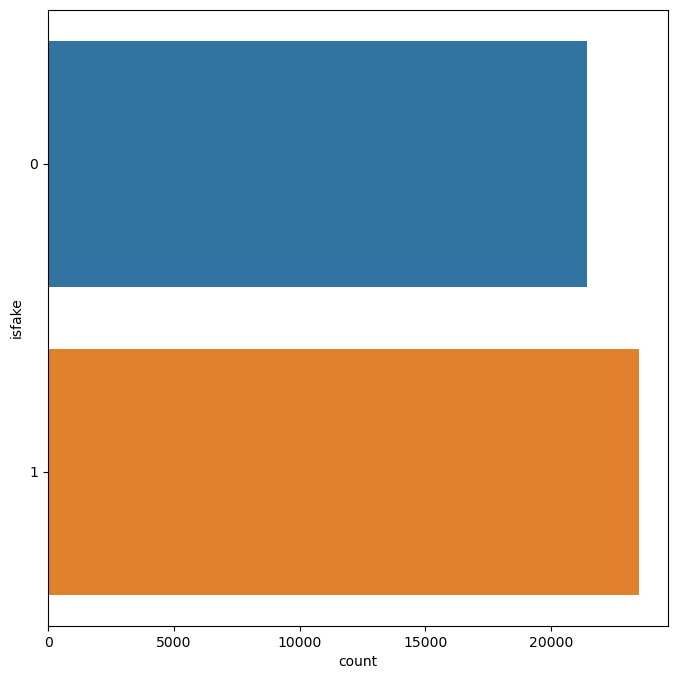

In [50]:
# plot the count plot fake vs true news
plt.figure(figsize = (8,8))
sns.countplot(y = 'isfake', data = df)

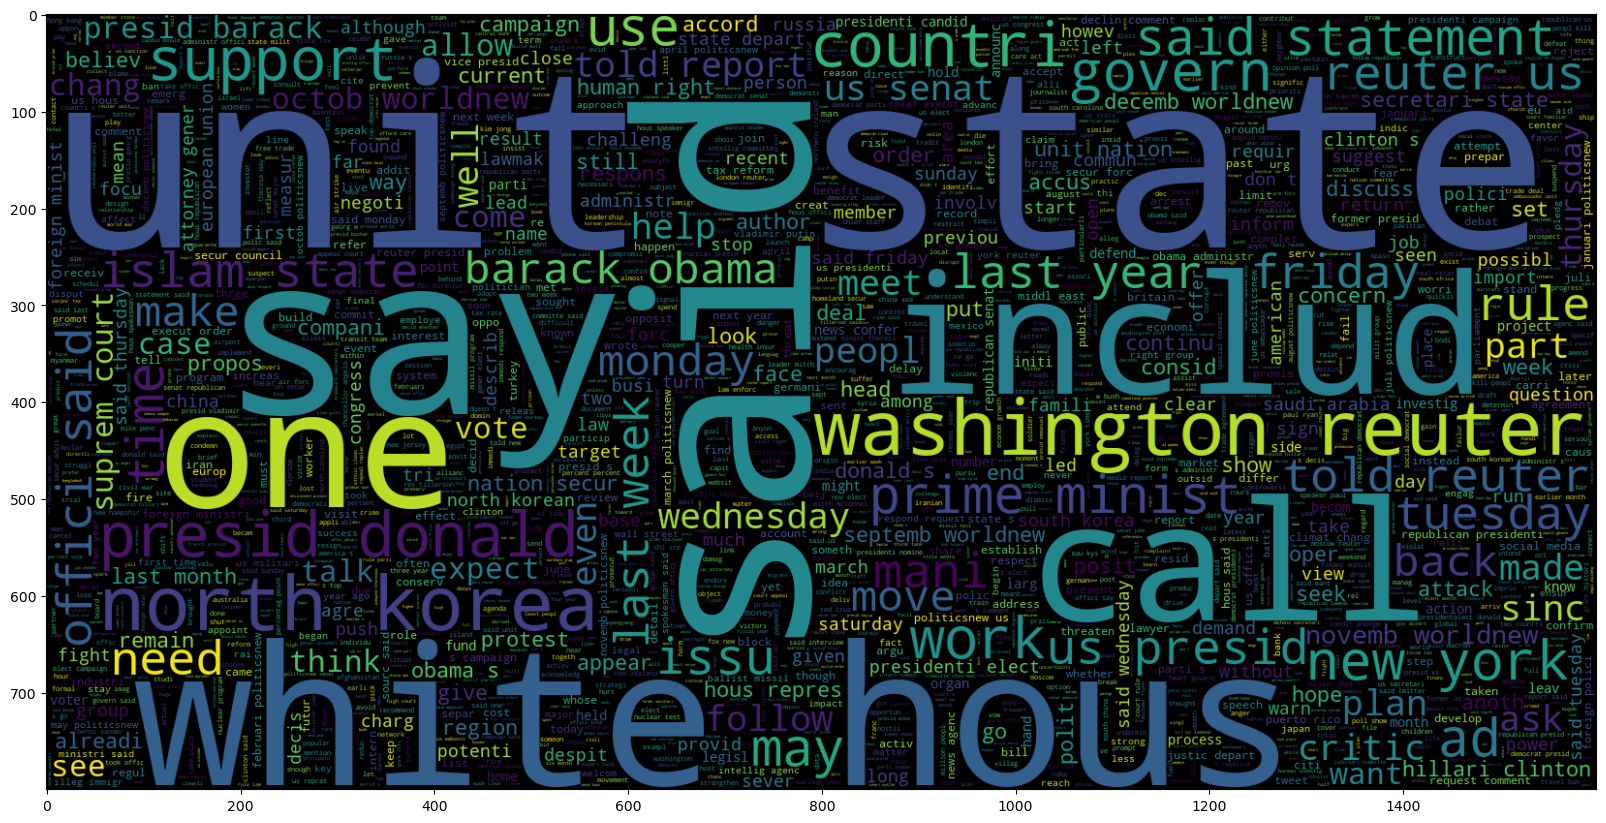

In [53]:
# plot the word cloud for text that is real
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.isfake == 0].text))
plt.imshow(wc, interpolation = 'bilinear')

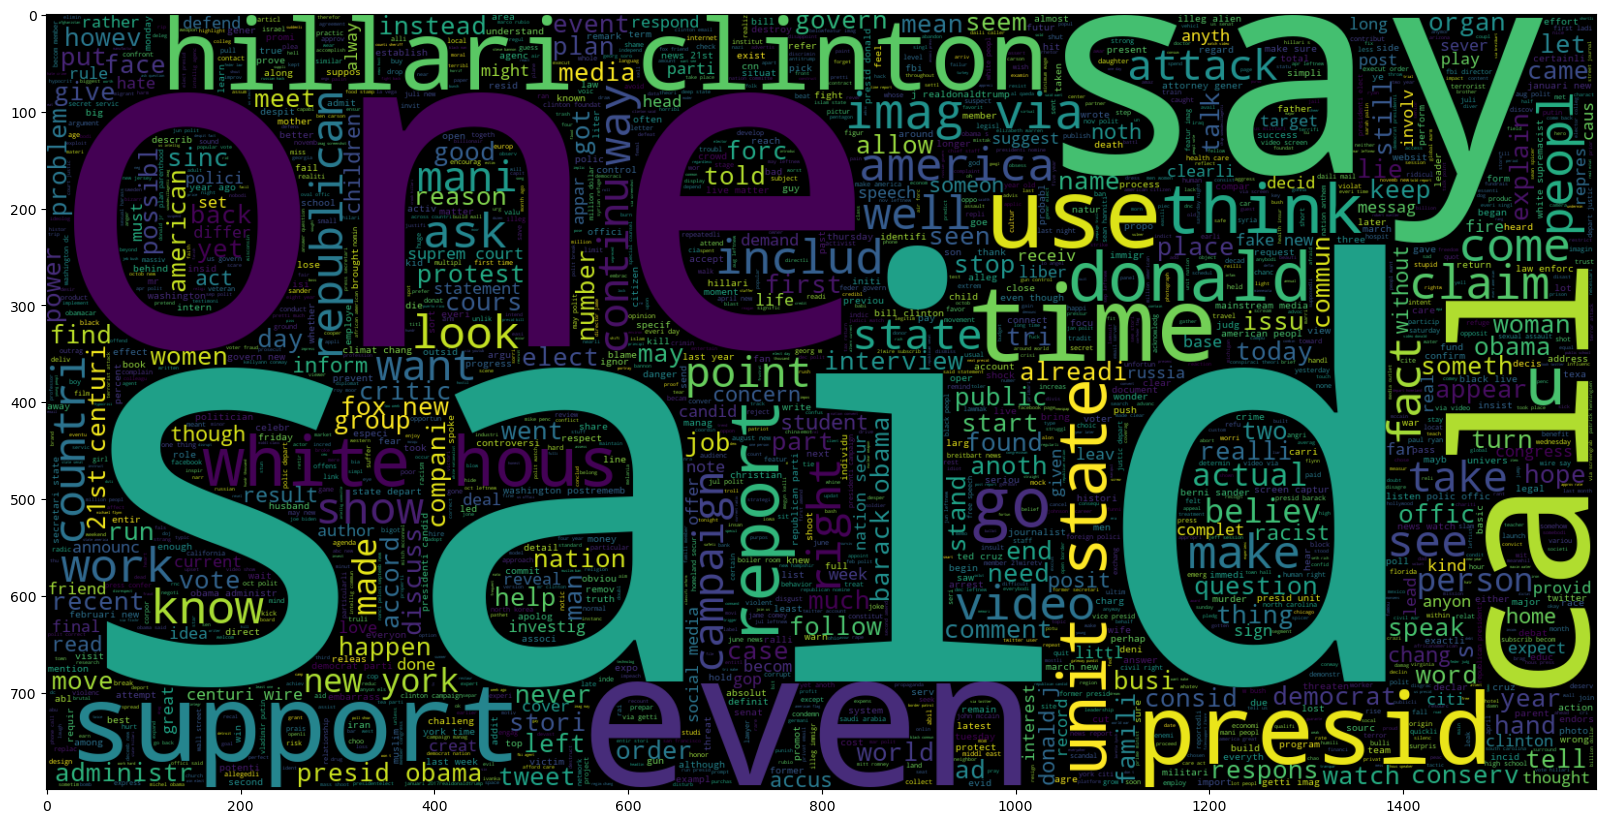

In [54]:
# plot the word cloud for text that is fake
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.isfake == 1].text))
plt.imshow(wc, interpolation = 'bilinear')

In [55]:
# length of maximum document will be needed to create word embeddings
maxlen = -1
for doc in df.text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4931


In [56]:
# visualize the distribution of number of words in a text
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.text], nbins= 100)
fig.show()

In [57]:
# split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.text, df.isfake, test_size = 0.2)

In [58]:
from nltk import word_tokenize
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [60]:
print("The encoding for document\n",df.text[0],"\n is : ",train_sequences[0])

The encoding for document
 decemb 31 2017 politicsnew us budget fight loom republican flip fiscal script washington reuter head conserv republican faction us congress vote month huge expans nation debt pay tax cut call fiscal conserv sunday urg budget restraint 2018 keep sharp pivot way among republican us repres mark meadow speak cb face nation drew hard line feder spend lawmak brace battl januari return holiday wednesday lawmak begin tri pass feder budget fight like link issu immigr polici even novemb congression elect campaign approach republican seek keep control congress presid donald republican want big budget increas militari spend democrat also want proport increas nondefens discretionari spend program support educ scientif research infrastructur public health environment protect the administr alreadi will say we re go increas nondefens discretionari spend 7 percent meadow chairman small influenti hous freedom caucu said program now democrat say that s enough need give govern p

In [61]:
# Add padding 
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [62]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [21 14 23 14 13 20 11  1  1 14 32  4 31  7  2  4 14  8 11  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
The padded encoding for document 2  is :  [31 13 18  5 18 30  7  5 30  8  6  6 11  5 18  6 28 25 18  5 11 26 17 13
 18 18 29  7 13 14 18  0  0  0  0  0  0  0  0  0]


In [63]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         4736      
                                                                 
 bidirectional (Bidirection  (None, 256)               263168    
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 284417 (1.08 MB)
Trainable params: 284417 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
y_train = np.asarray(y_train)

In [65]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 4)

Epoch 1/4
506/506 [==============================] - 59s 104ms/step - loss: 0.0472 - acc: 0.9824 - val_loss: 0.0101 - val_acc: 0.9975
Epoch 2/4
506/506 [==============================] - 50s 99ms/step - loss: 0.0083 - acc: 0.9982 - val_loss: 0.0059 - val_acc: 0.9986
Epoch 3/4
506/506 [==============================] - 58s 114ms/step - loss: 0.0070 - acc: 0.9984 - val_loss: 0.0053 - val_acc: 0.9983
Epoch 4/4
506/506 [==============================] - 53s 104ms/step - loss: 0.0062 - acc: 0.9985 - val_loss: 0.0048 - val_acc: 0.9989


In [77]:
# make prediction
pred = model.predict(padded_test)

281/281 [==============================] - 6s 20ms/step


In [78]:
# if the predicted value is >0.5 it is fake else it is real
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [79]:
# getting the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(list(y_test), prediction)
print("Model Accuracy : ", accuracy)

Model Accuracy :  0.7444320712694877


<Axes: >

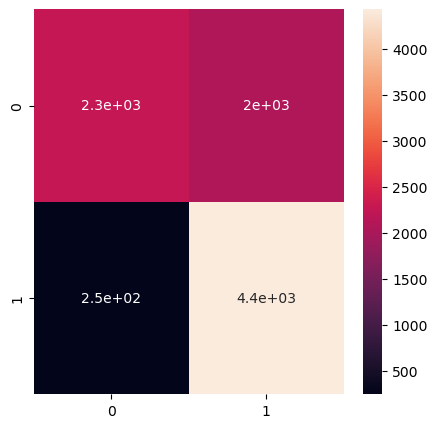

In [80]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True)

# Spelling Correction

In [41]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []
    misspelled_text = spell.unknown(text.split())
    # print(misspelled_text)
    for word in text.split():
        if word in misspelled_text:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
            
    return " ".join(corrected_text)

In [43]:
data['text'] = data['text'].apply(lambda x: correct_spellings(x))
data.head()

TypeError: sequence item 158: expected str instance, NoneType found